In [373]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

---
<h1>EDA</h1>

In [374]:
data = pd.read_csv("Titanic-Dataset.csv")
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [375]:
X = data
X = X.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [376]:
# CHECK NAN cell
X.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

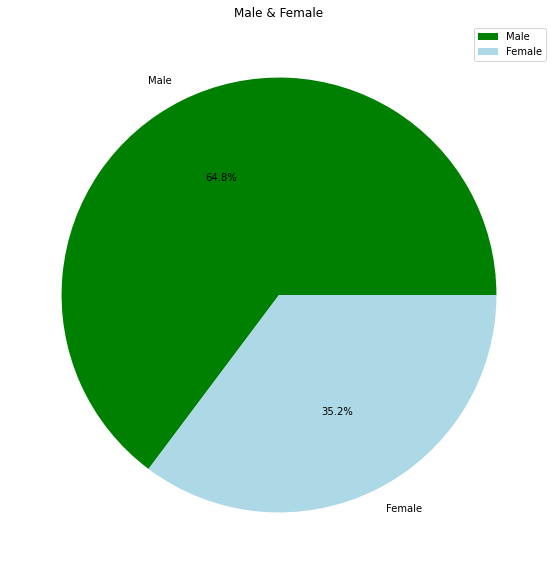

In [377]:
gender = data['Sex'].value_counts()
gender

plt.figure(figsize=(16,10))
plt.pie(gender, labels=['Male', 'Female'] ,autopct='%.1f%%', colors=['green','lightblue'])
plt.legend()
plt.title('Male & Female')
plt.show()

In [378]:
sv_sex = X[['Survived','Sex']].value_counts().reset_index()
sv_sex.columns = ['Survived', 'Sex', 'count']

sv_sex

,Survived,Sex,count
0,0,male,468
1,1,female,233
2,1,male,109
3,0,female,81


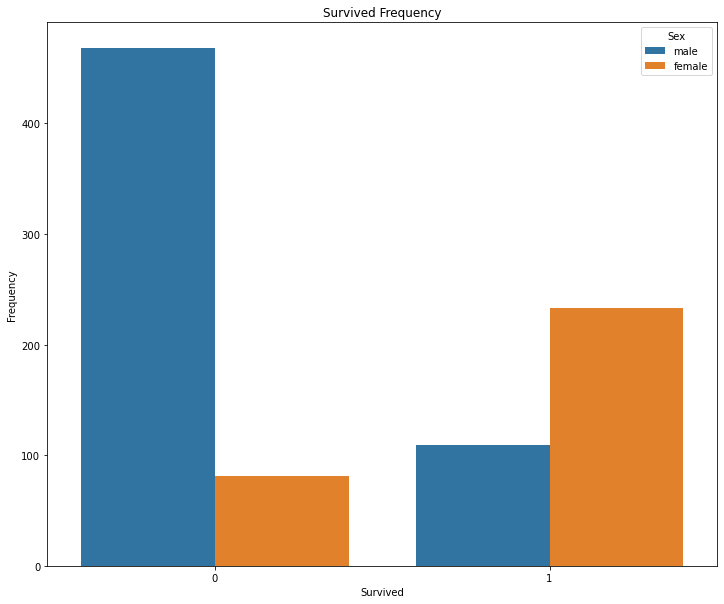

In [379]:
plt.figure(figsize=(12,10))
sns.barplot(data=sv_sex , x=sv_sex['Survived'], y=sv_sex['count'], hue=sv_sex['Sex'])
plt.title('Survived Frequency')
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.show()

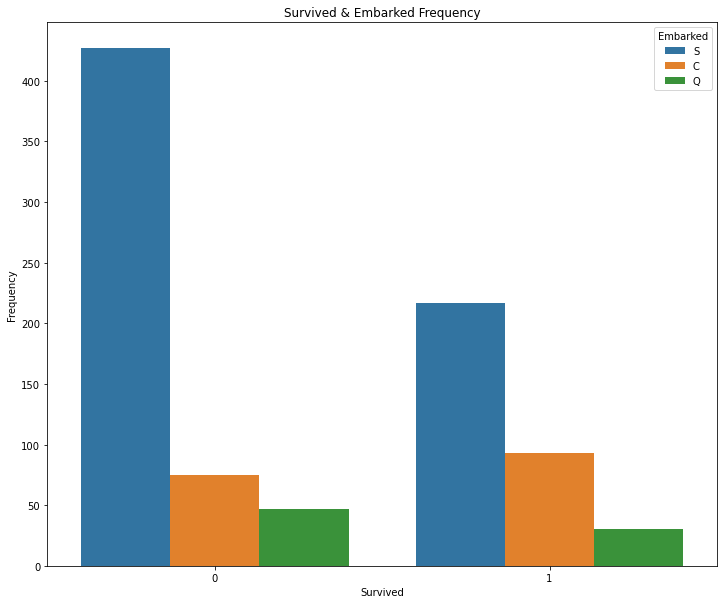

In [380]:
sv_em = data[['Survived', 'Embarked']].value_counts().reset_index()
sv_em.columns = ['Survived', 'Embarked', 'count']

plt.figure(figsize=(12,10))
sns.barplot(data=sv_em , x=sv_em['Survived'], y=sv_em['count'], hue=sv_em['Embarked'])
plt.title('Survived & Embarked Frequency')
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.show()

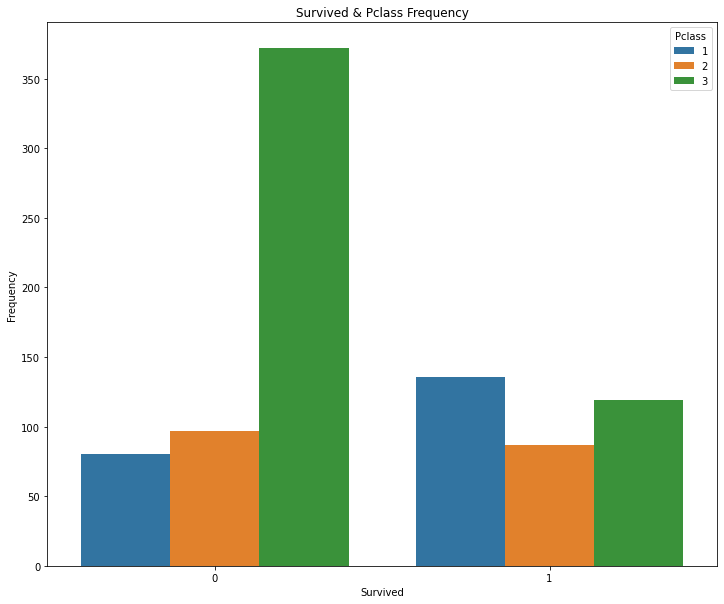

In [381]:
sv_class = data[['Survived', 'Pclass']].value_counts().reset_index()
sv_class.columns = ['Survived', 'Pclass', 'count']


plt.figure(figsize=(12,10))
sns.barplot(data=sv_class , x=sv_class['Survived'], y=sv_class['count'], hue=sv_class['Pclass'])
plt.title('Survived & Pclass Frequency')
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.show()

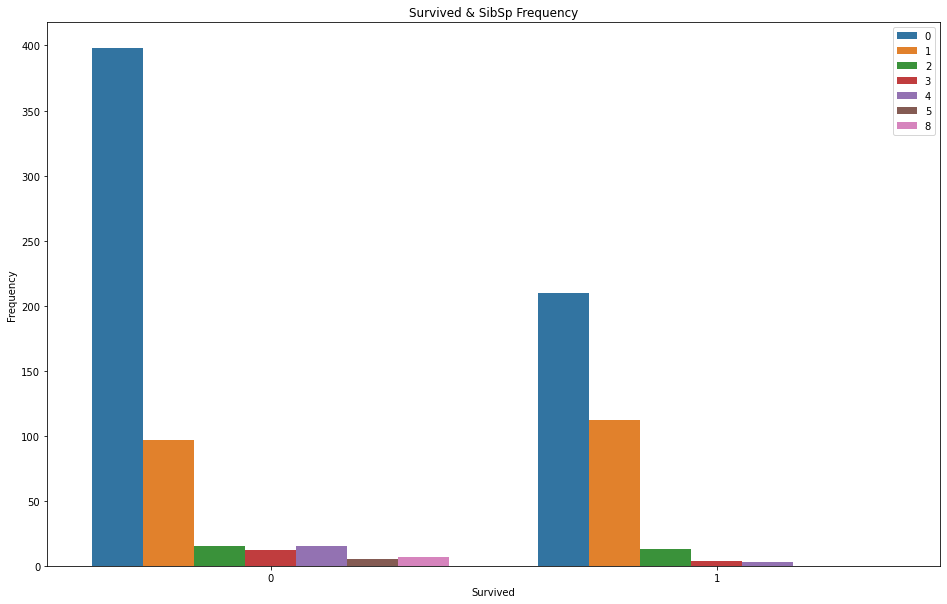

In [382]:
sv_sibling = data[['Survived', 'SibSp']].value_counts().reset_index()
sv_sibling.columns = ['Survived', 'SibSp', 'count']

plt.figure(figsize=(16,10))
sns.barplot(data=sv_sibling , x=sv_sibling['Survived'], y=sv_sibling['count'], hue=sv_sibling['SibSp'])
plt.title('Survived & SibSp Frequency')
plt.legend(loc='upper right')
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.show()

In [383]:
X.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [384]:
#fill in Nan by age by mean sex
X['Age'].fillna(X['Age'].mean(), inplace=True)

In [385]:
X = X.dropna()

In [386]:
X.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [387]:
X

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


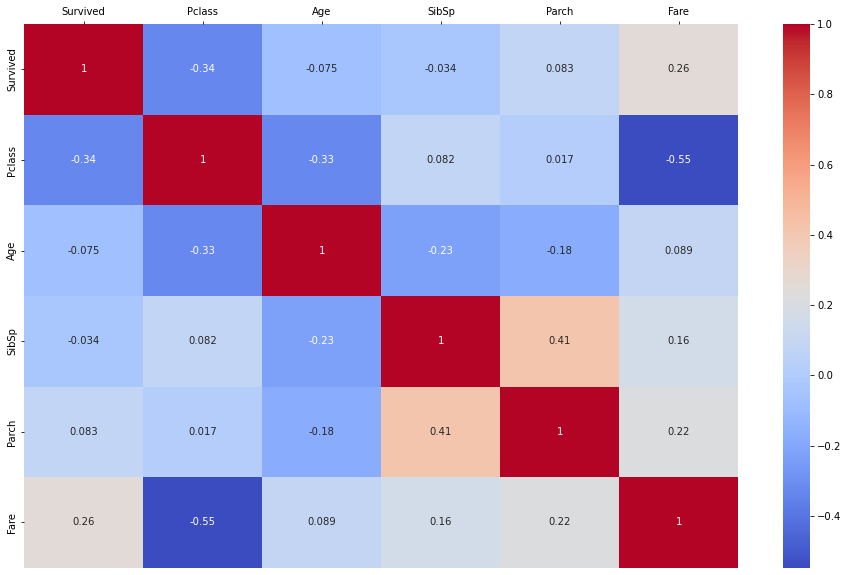

In [388]:
#CREATE TABLE OF CORRELATION
fig = plt.figure()
fig.set_size_inches((16,10))
ax = sns.heatmap(X.corr(), annot=True, cmap = "coolwarm",cbar = True)
ax.xaxis.tick_top()

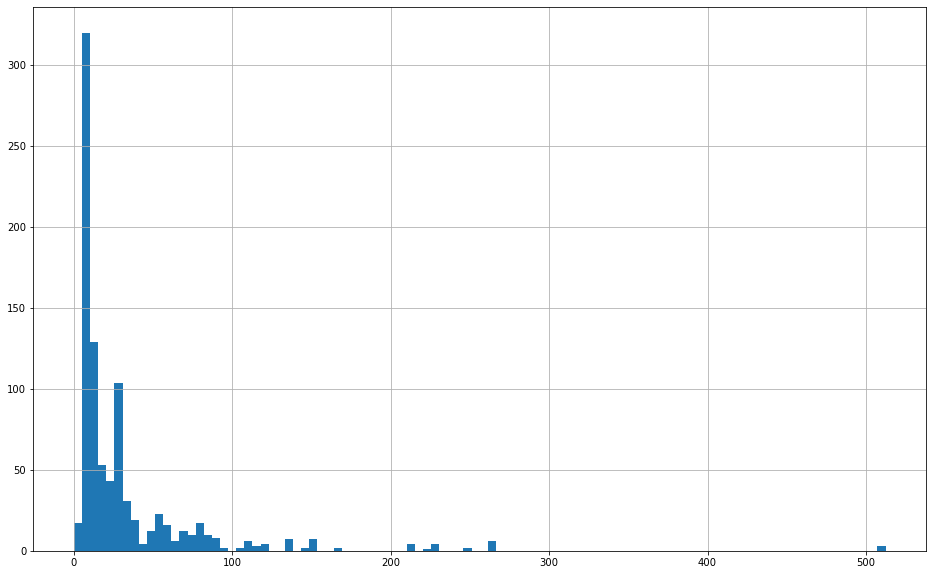

In [389]:
#check for discard in 'Fare'

fig = plt.figure()
fig.set_size_inches((16, 10))
X['Fare'].hist(bins=100)

plt.show()

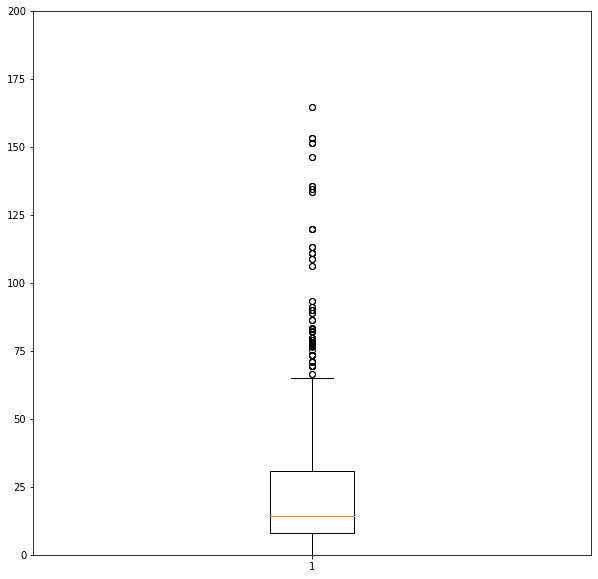

31.0 7.8958


In [390]:
fig = plt.figure()
fig.set_size_inches((10, 10))

plt.boxplot(X['Fare'].values)
plt.ylim(0, 200)
plt.show()



q_high = X['Fare'].quantile(0.75)
q_low = X['Fare'].quantile(0.25)
print(q_high, q_low)
tentacle_length = q_high - q_low
upper_tentacle = q_high + 3 * tentacle_length 
X = X[X['Fare'] < upper_tentacle]

In [391]:
X

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


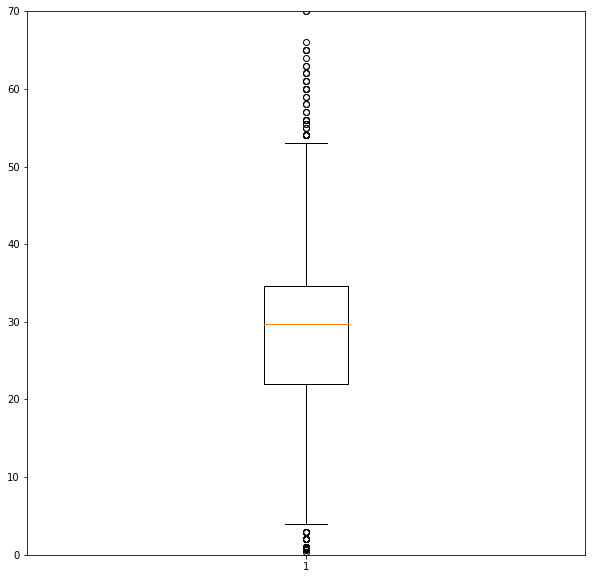

34.625 22.0


In [392]:
fig = plt.figure()
fig.set_size_inches((10, 10))

plt.boxplot(X['Age'].values)
plt.ylim(0, 70)
plt.show()


q_high = X['Age'].quantile(0.75)
q_low = X['Age'].quantile(0.25)
print(q_high, q_low)
tentacle_length = q_high - q_low
upper_tentacle = q_high + 3 * tentacle_length 
X = X[X['Age'] < upper_tentacle]

In [393]:
X

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [394]:
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [395]:
label_encoder = LabelEncoder()

In [396]:
X['Sex'] = label_encoder.fit_transform(X['Sex'])
X['Embarked'] = label_encoder.fit_transform(X['Embarked'])

In [397]:
X

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


In [398]:
Y = X['Survived']
X = X.drop('Survived', axis=1)

In [399]:
X.corr()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Pclass,1.000000,0.077352,-0.353343,0.103817,0.091081,-0.641187,0.100874
Sex,0.077352,1.000000,0.096752,-0.116686,-0.263502,-0.187470,0.092578
Age,-0.353343,0.096752,1.000000,-0.232596,-0.193420,0.141737,-0.018256
SibSp,0.103817,-0.116686,-0.232596,1.000000,0.418439,0.348913,0.068312
Parch,0.091081,-0.263502,-0.193420,0.418439,1.000000,0.230666,0.043636
Fare,-0.641187,-0.187470,0.141737,0.348913,0.230666,1.000000,-0.137799
Embarked,0.100874,0.092578,-0.018256,0.068312,0.043636,-0.137799,1.000000


---
<h1>Bulid The Model</h1>

In [400]:
test = X.drop(['Pclass'], axis=1)
test.corr()

,Sex,Age,SibSp,Parch,Fare,Embarked
Sex,1.000000,0.096752,-0.116686,-0.263502,-0.187470,0.092578
Age,0.096752,1.000000,-0.232596,-0.193420,0.141737,-0.018256
SibSp,-0.116686,-0.232596,1.000000,0.418439,0.348913,0.068312
Parch,-0.263502,-0.193420,0.418439,1.000000,0.230666,0.043636
Fare,-0.187470,0.141737,0.348913,0.230666,1.000000,-0.137799
Embarked,0.092578,-0.018256,0.068312,0.043636,-0.137799,1.000000


In [401]:
from sklearn.model_selection import train_test_split

#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size=0.2)
X_train, X_test, Y_train, Y_test = train_test_split(test, Y, random_state=0, test_size=0.2)


In [402]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


pipe = Pipeline([('scaler', StandardScaler()),
                 ('LR', LogisticRegression(penalty='none'))])

pipe.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('LR', LogisticRegression(penalty='none'))])

In [403]:
pipe.score(X_test, Y_test)

0.7844311377245509

In [404]:
print(pipe.classes_)
print(pipe.predict(X_test.head(1)))
print(pipe.predict_proba(X_test.head(1)))

[0 1]
[1]
[[0.09274275 0.90725725]]


---
<h1>Time to your data</h1>

In [405]:
test

,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,22.000000,1,0,7.2500,2
1,0,38.000000,1,0,71.2833,0
2,0,26.000000,0,0,7.9250,2
3,0,35.000000,1,0,53.1000,2
4,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...
886,1,27.000000,0,0,13.0000,2
887,0,19.000000,0,0,30.0000,2
888,0,29.699118,1,2,23.4500,2
889,1,26.000000,0,0,30.0000,0


In [406]:
#string = {'Pclass': [1], 'Sex': [1], 'Age': [19.0], 'SibSp': [0], 'Parch': [0], 'Fare': [100], 'Embarked_Q': [1]}

string = {'Sex': [1], 'Age': [19.0], 'SibSp': [0], 'Parch': [0], 'Fare': [100], 'Embarked_Q': [1]}

test_string = pd.DataFrame(string)
print(pipe.predict(test_string))
print(pipe.predict_proba(test_string))

[1]
[[0.07203717 0.92796283]]
